In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/sample_data/cropdata_updated.csv')

In [ ]:
print("Class Distribution:")
print(df['result'].value_counts())
print("-" * 30)

Class Distribution:
result
0    9062
1    6227
2    1122
Name: count, dtype: int64
------------------------------


In [ ]:
df_encoded = pd.get_dummies(df, columns=['crop ID', 'soil_type', 'Seedling Stage'])

X = df_encoded.drop('result', axis=1)
y = df_encoded['result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1835
           1       0.87      0.80      0.83      1231
           2       0.20      0.75      0.31       217

    accuracy                           0.73      3283
   macro avg       0.67      0.75      0.65      3283
weighted avg       0.87      0.73      0.78      3283

Confusion matrix plot saved to ../models/confusion_matrix.png


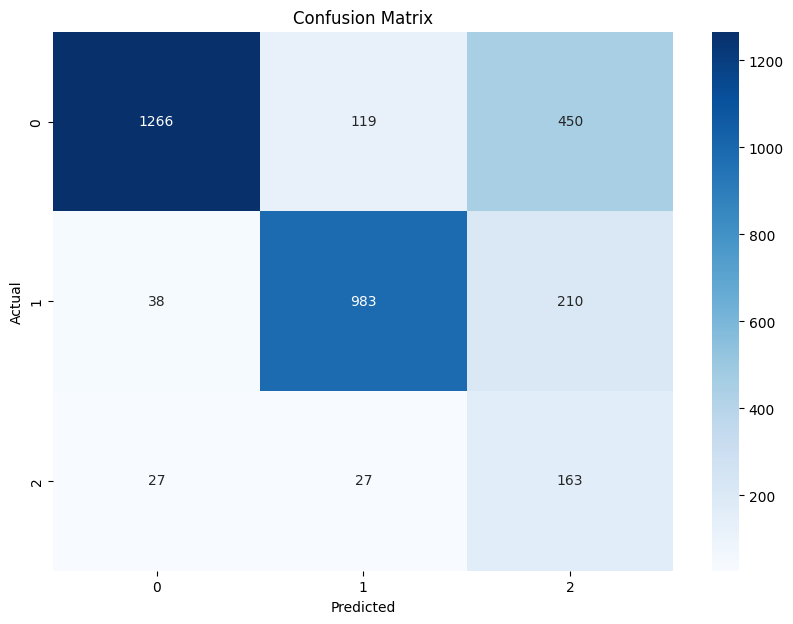

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('../content/sample_data')
print("Confusion matrix plot saved to ../models/confusion_matrix.png")
plt.show()

In [ ]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1835
           1       0.82      0.85      0.84      1231
           2       0.00      0.00      0.00       217

    accuracy                           0.83      3283
   macro avg       0.55      0.59      0.57      3283
weighted avg       0.78      0.83      0.80      3283



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
print("Class Distribution:")
print(df['result'].value_counts())
print("-" * 30)

# Prepare the data
df_encoded = pd.get_dummies(df, columns=['crop ID', 'soil_type', 'Seedling Stage'])

X = df_encoded.drop('result', axis=1)
y = df_encoded['result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Class Distribution:
result
0    9062
1    6227
2    1122
Name: count, dtype: int64
------------------------------



Training a Neural Network Model


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6395 - loss: 0.8009 - val_accuracy: 0.8488 - val_loss: 0.4122
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8092 - loss: 0.4853 - val_accuracy: 0.8827 - val_loss: 0.2969
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8574 - loss: 0.3614 - val_accuracy: 0.9002 - val_loss: 0.2372
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8693 - loss: 0.3178 - val_accuracy: 0.9208 - val_loss: 0.2040
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8917 - loss: 0.2684 - val_accuracy: 0.9326 - val_loss: 0.1737
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8996 - loss: 0.2365 - val_accuracy: 0.9436 - val_loss: 0.1463
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9134 - loss: 0.2143 - val_accuracy: 0.9391 - val_loss: 0.1542
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9200 - loss: 0.1980 - val_accuracy: 0.

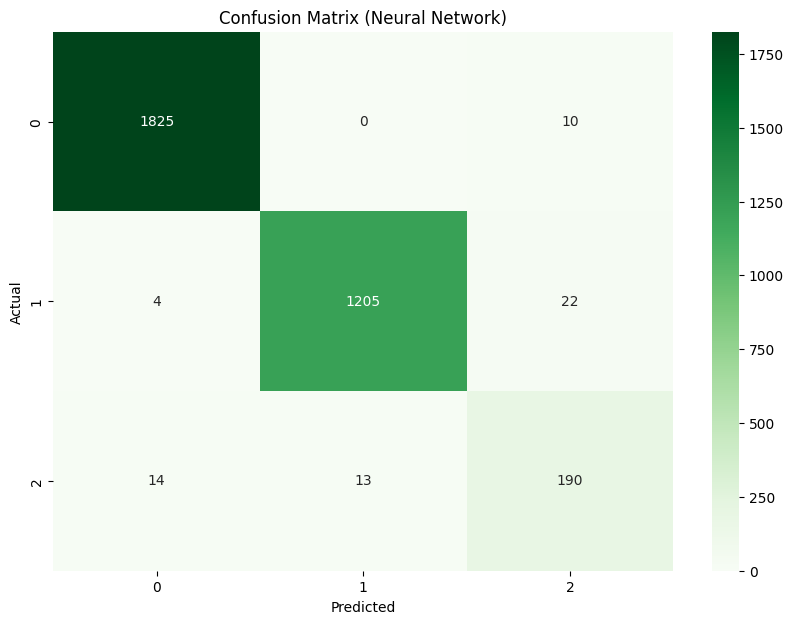

In [ ]:
print("\n" + "="*50)
print("Training a Neural Network Model")
print("="*50)

# The target variable `y` needs to be one-hot encoded for the neural network
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Define the model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_nn.shape[1], activation='softmax') # Output layer with softmax for multi-class
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train_nn,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

# Evaluate the model
print("\n--- Neural Network Evaluation ---")
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test_nn, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_nn_prob = nn_model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1) # Convert probabilities to class labels

# Print classification report
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

# Generate and plot confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network)')
plt.savefig('../content/sample_data')
print("Neural network confusion matrix plot saved to ../models/confusion_matrix_nn.png")
plt.show()


Training history plot saved to ../models/training_history.png


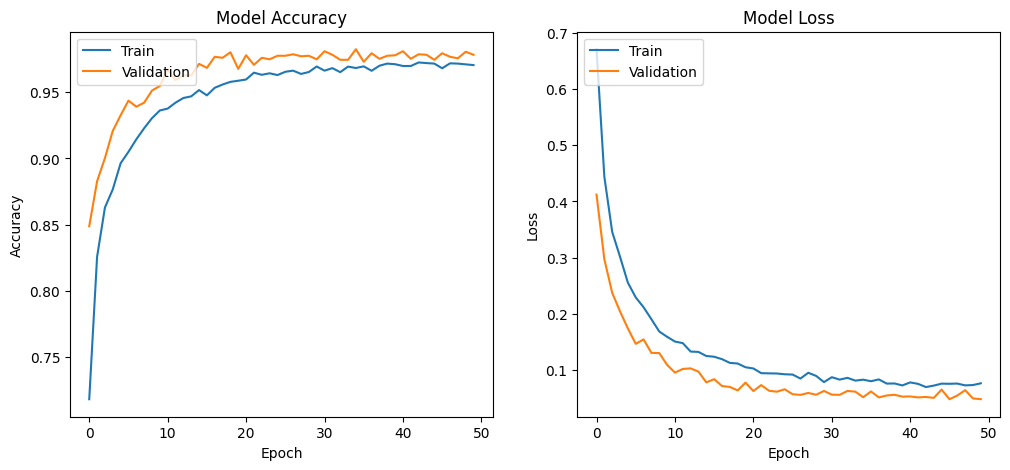

In [29]:
# --- New: Plot training history ---
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('../content/sample_data')
print("Training history plot saved to ../models/training_history.png")
plt.show()

In [34]:
with open('../content/sample_data/columns.pkl', 'wb') as f:
    pickle.dump(X.columns, f)

with open('../content/sample_data/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [33]:
nn_model.save('../content/sample_data/neural_network_model.h5')
print("Neural network model, columns, and scaler saved successfully!")

Neural network model, columns, and scaler saved successfully!
